<a href="https://colab.research.google.com/github/IANovoselov/data_science/blob/main/ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.set(rc={'figure.figsize': (9, 6)})

In [5]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [7]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [11]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [12]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [15]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [17]:
events_data.dtypes

,0
step_id,int64
timestamp,int64
action,object
user_id,int64
date,datetime64[ns]


In [44]:
events_data['day'] = events_data['date'].dt.date

In [49]:
events_data.head()


,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


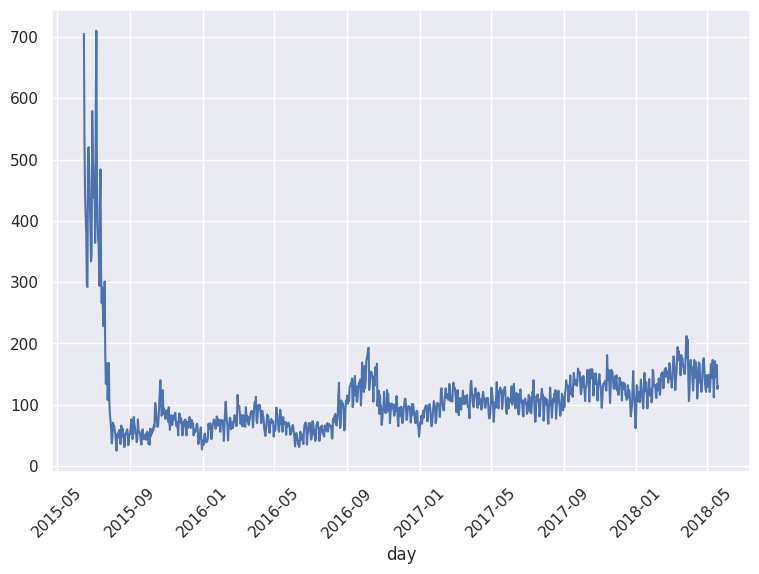

In [55]:
events_data.groupby('day').user_id.nunique().plot().tick_params(axis='x', rotation=45) # Группировка по дням с подсчётом уникальных пользователей в течение дня

In [72]:
starting_date = events_data.groupby("user_id", as_index = False).date.min()

In [73]:
starting_date['day'] = starting_date['date'].dt.date

<Axes: xlabel='day'>

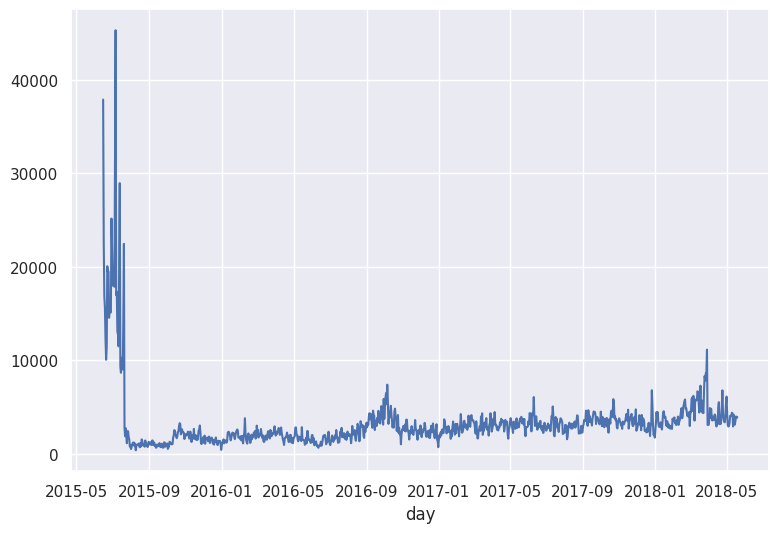

In [83]:
events_data.groupby("day").size().plot()  # А это количество новых пользователей по дням

In [82]:
# Распределение пройденных степов по пользователям
df1 = events_data[events_data.action=='passed']\
.groupby('user_id',as_index=False)\
.agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'})
df1

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


<Axes: >

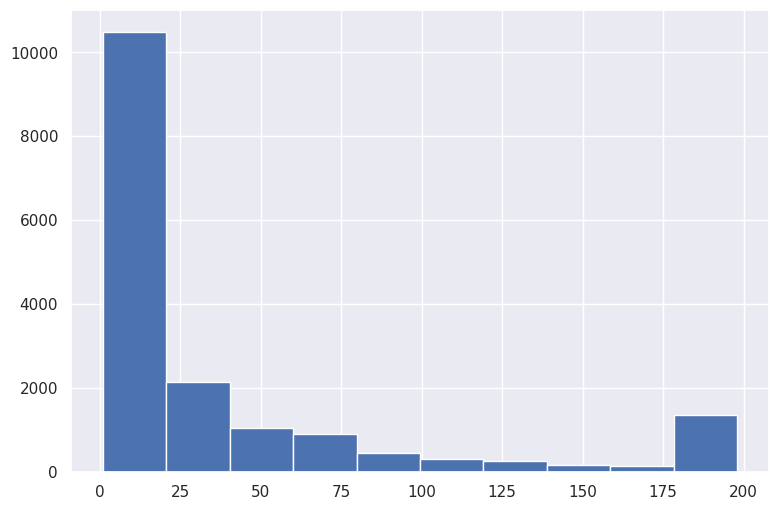

In [91]:
df1.passed_steps.hist()
# По х - количестов степов, по y - количество пользователей

In [97]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [98]:
# Выше не учли, что есть пользователи у которых нет пройденных степов, то есть events_data.action=='passed' нет таких
events_data.pivot_table(index='user_id', # в результате каждая строчка будет информацией о каждом уникальном index

                        columns='action', # столбцы будут отвеать за уникальные значения columns

                        values='step_id', # по кауому полю будеи делать аггрегацию

                        aggfunc='count', # аггрегированная по aggfunc

                        fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


<Axes: >

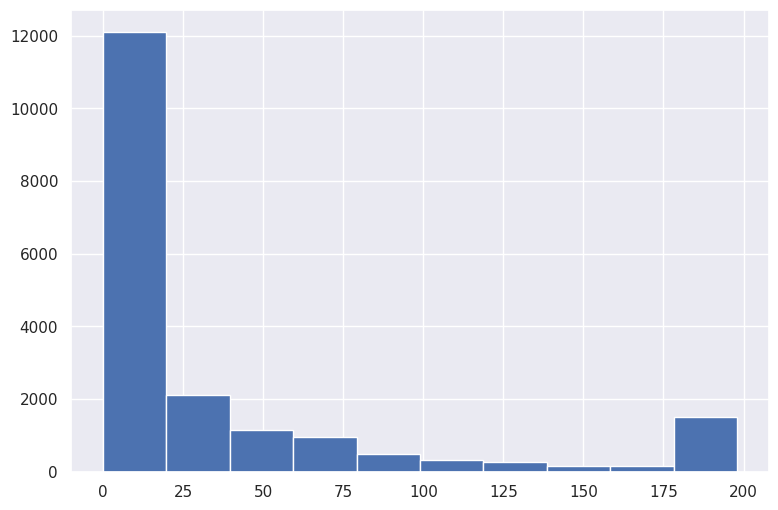

In [100]:
events_data.pivot_table(index='user_id', # в результате каждая строчка будет информацией о каждом уникальном index

                        columns='action', # столбцы будут отвеать за уникальные значения columns

                        values='step_id', # по кауому полю будеи делать аггрегацию

                        aggfunc='count', # аггрегированная по aggfunc

                        fill_value=0).reset_index().discovered.hist()